<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB
None
   ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0   1               D           Flight                    4           

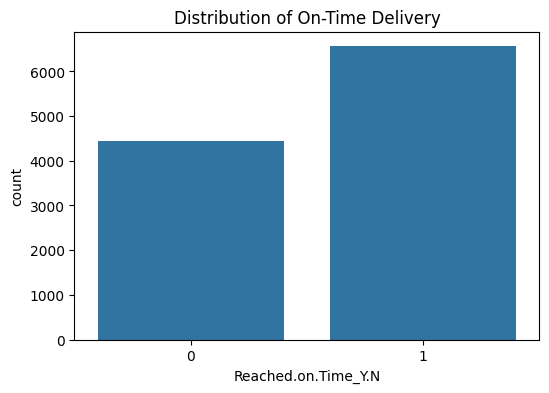

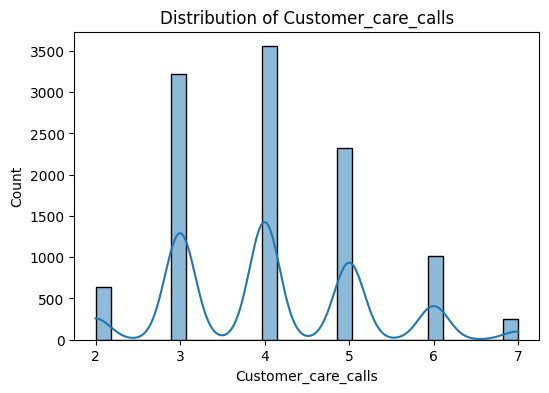

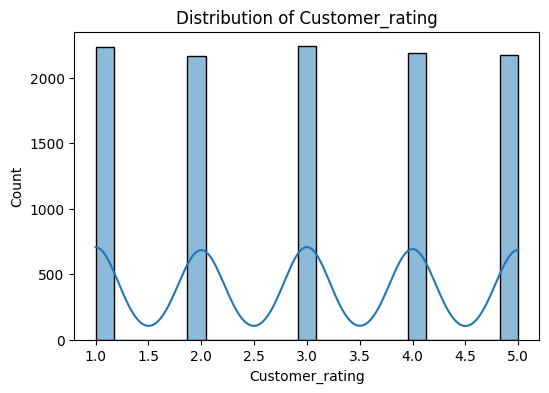

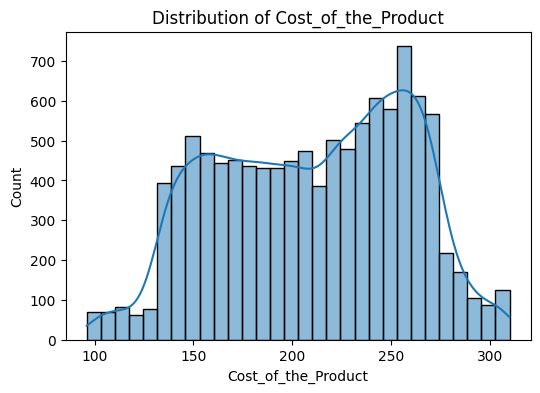

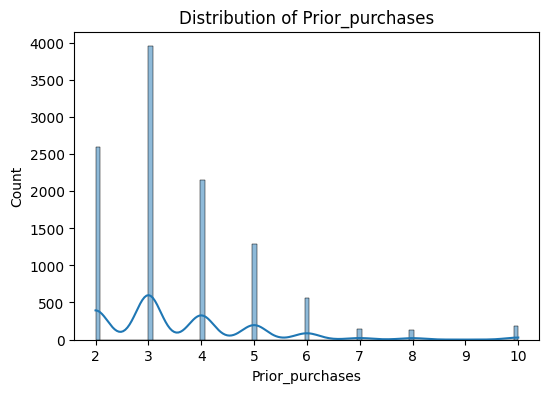

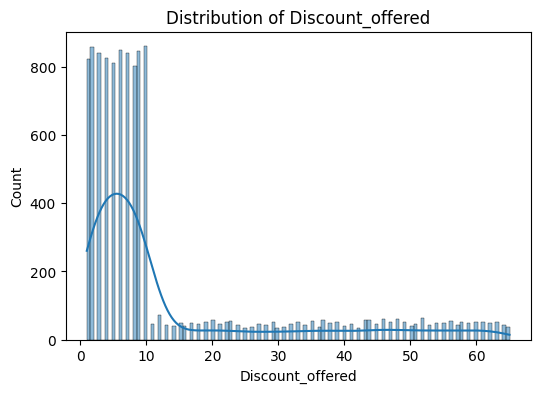

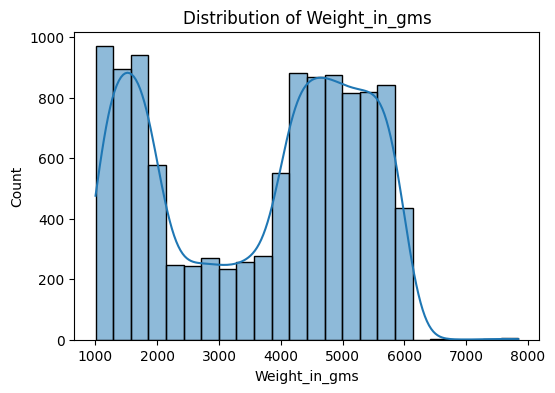

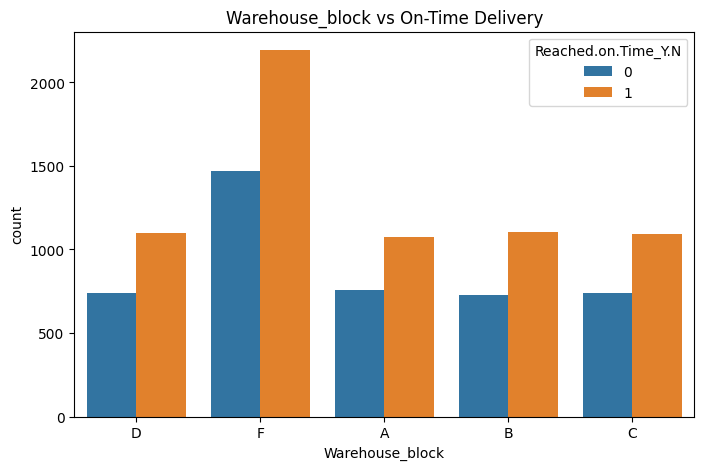

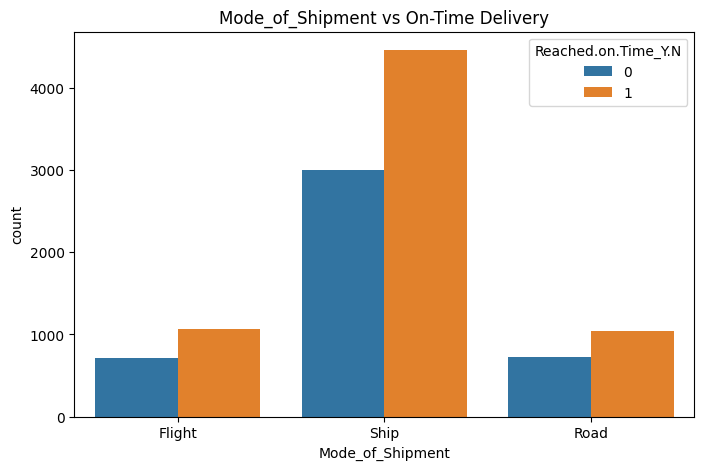

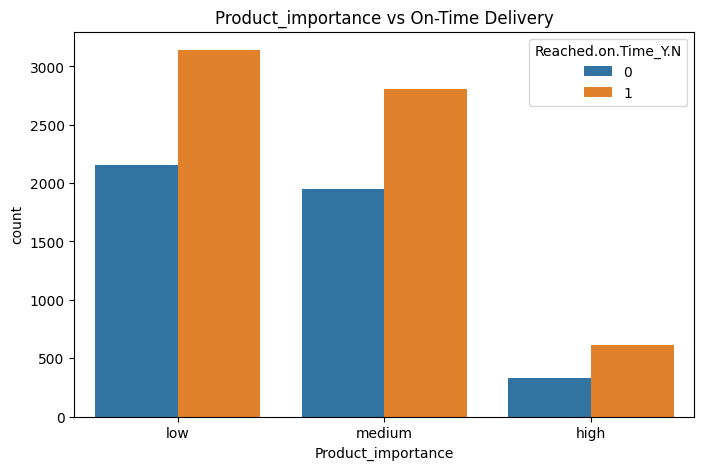

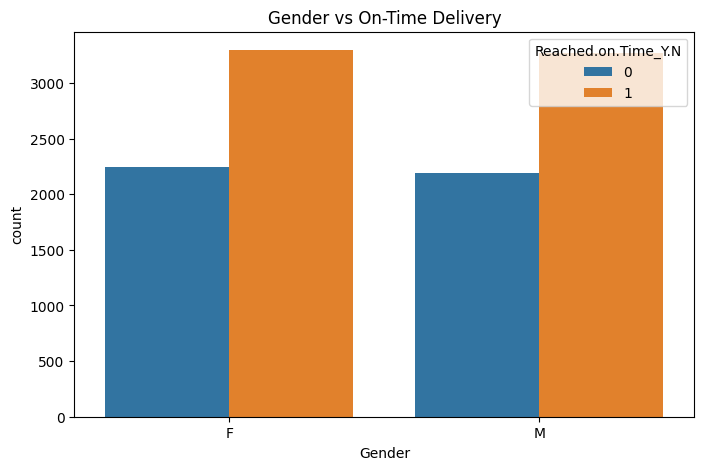

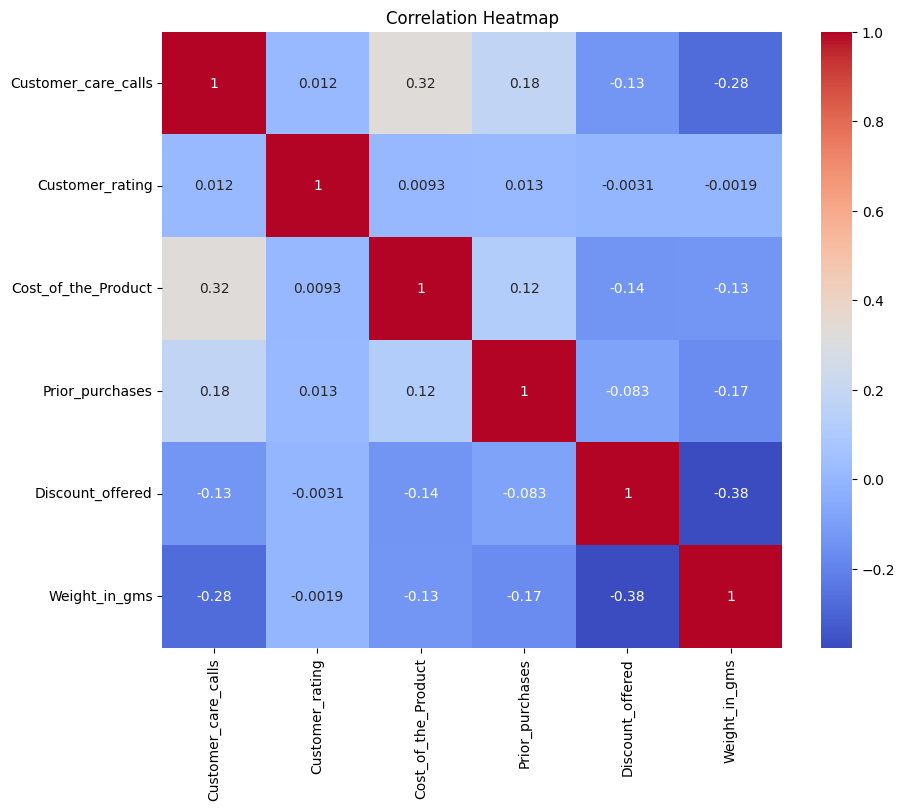

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (assuming it's in CSV format)
data = pd.read_csv('/workspaces/DSAI/E_Commerce.csv')  # Replace with actual file path

# Display basic information
print(data.info())
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Summary statistics
print(data.describe())

# Visualize target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Reached.on.Time_Y.N', data=data)
plt.title('Distribution of On-Time Delivery')
plt.show()

# Visualize numerical feature distributions
numerical_cols = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 
                  'Prior_purchases', 'Discount_offered', 'Weight_in_gms']
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Visualize categorical features vs target
categorical_cols = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, hue='Reached.on.Time_Y.N', data=data)
    plt.title(f'{col} vs On-Time Delivery')
    plt.show()

# Correlation heatmap for numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

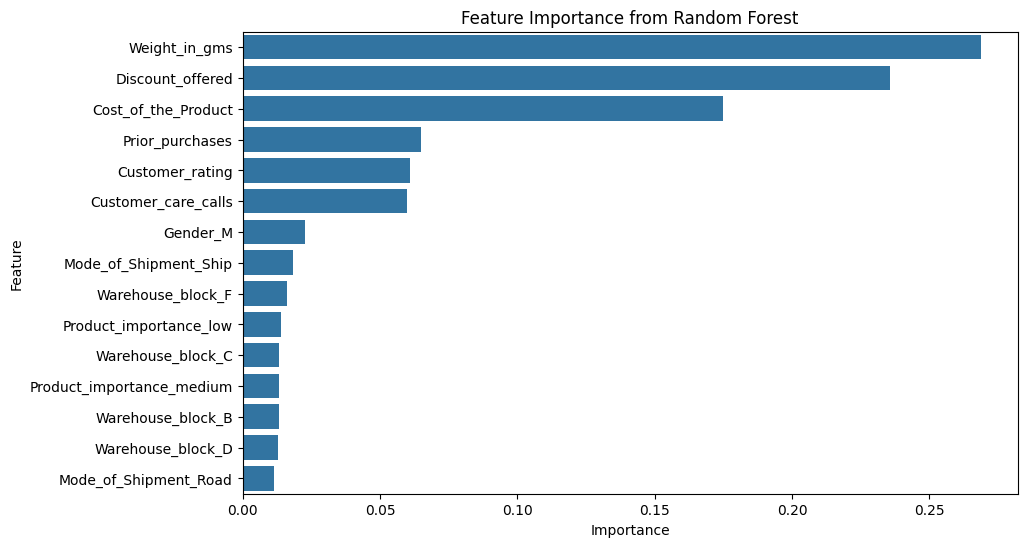

In [3]:
# Drop ID column (not useful for prediction)
data = data.drop('ID', axis=1)

# Encode categorical variables using one-hot encoding
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Define features (X) and target (y)
X = data_encoded.drop('Reached.on.Time_Y.N', axis=1)
y = data_encoded['Reached.on.Time_Y.N']

# Optional: Feature importance using Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance from Random Forest')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=10000, random_state=42),
    'KNN': KNeighborsClassifier()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {
        'Accuracy': accuracy,
        'Confusion Matrix': confusion_matrix(y_test, y_pred),
        'Classification Report': classification_report(y_test, y_pred)
    }
    print(f'\n{name} Results:')
    print(f'Accuracy: {accuracy:.4f}')
    print('Confusion Matrix:\n', results[name]['Confusion Matrix'])
    print('Classification Report:\n', results[name]['Classification Report'])


Random Forest Results:
Accuracy: 0.6627
Confusion Matrix:
 [[611 284]
 [458 847]]
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.68      0.62       895
           1       0.75      0.65      0.70      1305

    accuracy                           0.66      2200
   macro avg       0.66      0.67      0.66      2200
weighted avg       0.68      0.66      0.67      2200


Decision Tree Results:
Accuracy: 0.6427
Confusion Matrix:
 [[482 413]
 [373 932]]
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.54      0.55       895
           1       0.69      0.71      0.70      1305

    accuracy                           0.64      2200
   macro avg       0.63      0.63      0.63      2200
weighted avg       0.64      0.64      0.64      2200


Logistic Regression Results:
Accuracy: 0.6432
Confusion Matrix:
 [[500 395]
 [390 915]]
Classification Report:
               preci

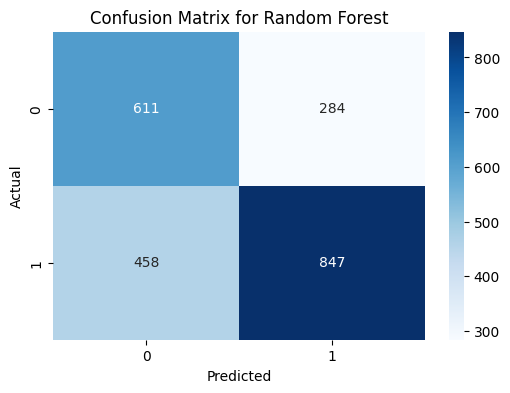

In [6]:
# Visualize confusion matrix for the best model (e.g., Random Forest)
best_model_name = 'Random Forest'  # Replace with the best-performing model
cm = results[best_model_name]['Confusion Matrix']
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix for {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

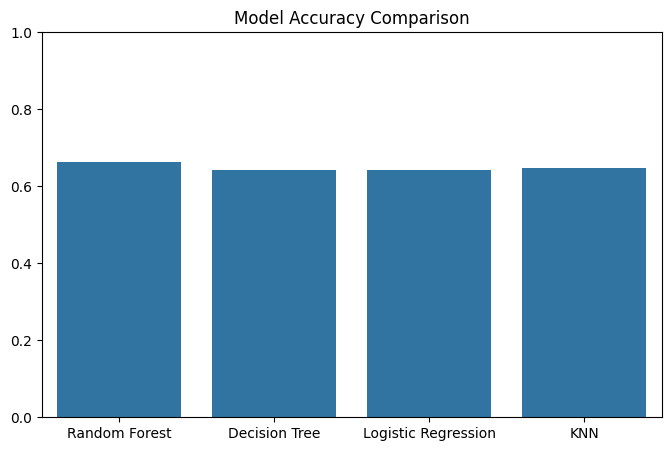

In [7]:
# Comparative accuracy plot
accuracies = [results[name]['Accuracy'] for name in models.keys()]
plt.figure(figsize=(8, 5))
sns.barplot(x=list(models.keys()), y=accuracies)
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.show()